In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("retail_transactions.csv")
df.head(11)

,CustomerID,TransactionID,TransactionDate,AmountSpent,Category,StoreLocation
0,CUST_041,TX_00099,2023-01-01,115.68,Books,New York
1,CUST_111,TX_00062,2023-01-01,258.55,Furniture,Chicago
2,CUST_123,TX_00235,2023-01-01,364.93,Electronics,New York
3,CUST_043,TX_00894,2023-01-02,416.35,Groceries,Houston
4,CUST_192,TX_00360,2023-01-02,127.20,Clothing,Houston
5,CUST_078,TX_00935,2023-01-03,12.70,Electronics,Chicago
6,CUST_181,TX_00648,2023-01-03,390.59,Electronics,Chicago
7,CUST_164,TX_00589,2023-01-03,170.81,Books,Los Angeles
8,CUST_175,TX_00039,2023-01-04,312.40,Groceries,Houston
9,CUST_101,TX_00557,2023-01-04,444.24,Groceries,Chicago


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   object 
 1   TransactionID    1000 non-null   object 
 2   TransactionDate  1000 non-null   object 
 3   AmountSpent      1000 non-null   float64
 4   Category         1000 non-null   object 
 5   StoreLocation    1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [6]:
df.describe()

,AmountSpent
count,1000.00000
mean,254.93447
std,141.24449
min,10.77000
25%,130.98250
50%,261.02500
75%,372.95250
max,499.71000


In [10]:
# Unique values in categorical columns
df['Category'].unique()

array(['Books', 'Furniture', 'Electronics', 'Groceries', 'Clothing'],
      dtype=object)

In [11]:
df['StoreLocation'].unique()

array(['New York', 'Chicago', 'Houston', 'Los Angeles', 'San Francisco'],
      dtype=object)

In [12]:
# Count missing values per column
df.isnull().sum()

CustomerID         0
TransactionID      0
TransactionDate    0
AmountSpent        0
Category           0
StoreLocation      0
dtype: int64

In [14]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


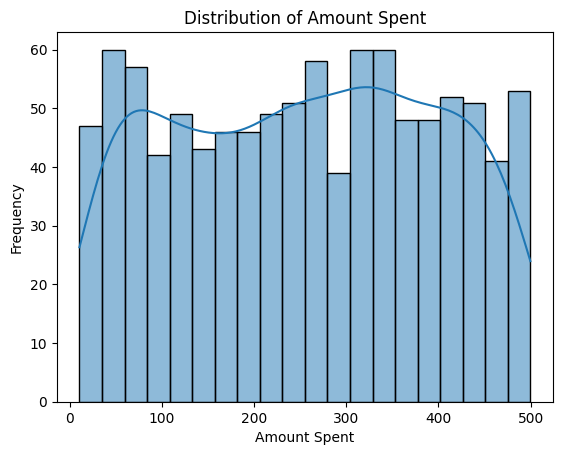

In [17]:
# Plot distribution of AmountSpent
sns.histplot(df['AmountSpent'], bins=20, kde=True)
plt.title('Distribution of Amount Spent')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()

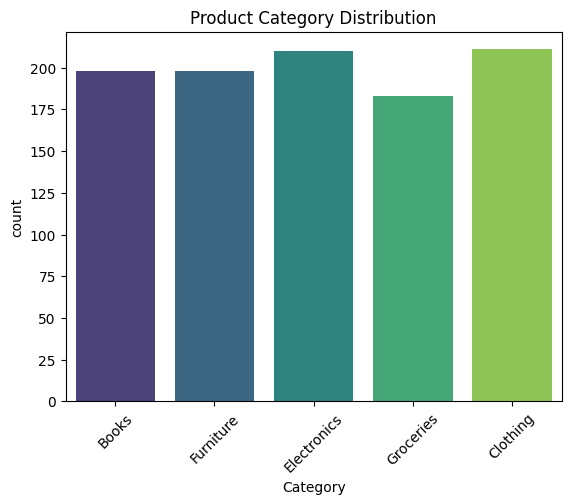

In [20]:
# Countplot for product categories
sns.countplot(x='Category', data=df, palette='viridis', hue="Category")
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

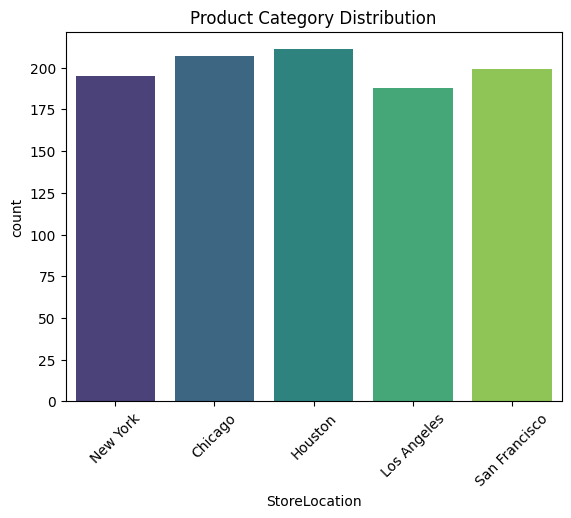

In [21]:
sns.countplot(x='StoreLocation', data=df, palette='viridis', hue="StoreLocation")
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Convert to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [23]:
df.head(11)

,CustomerID,TransactionID,TransactionDate,AmountSpent,Category,StoreLocation
0,CUST_041,TX_00099,2023-01-01,115.68,Books,New York
1,CUST_111,TX_00062,2023-01-01,258.55,Furniture,Chicago
2,CUST_123,TX_00235,2023-01-01,364.93,Electronics,New York
3,CUST_043,TX_00894,2023-01-02,416.35,Groceries,Houston
4,CUST_192,TX_00360,2023-01-02,127.20,Clothing,Houston
5,CUST_078,TX_00935,2023-01-03,12.70,Electronics,Chicago
6,CUST_181,TX_00648,2023-01-03,390.59,Electronics,Chicago
7,CUST_164,TX_00589,2023-01-03,170.81,Books,Los Angeles
8,CUST_175,TX_00039,2023-01-04,312.40,Groceries,Houston
9,CUST_101,TX_00557,2023-01-04,444.24,Groceries,Chicago


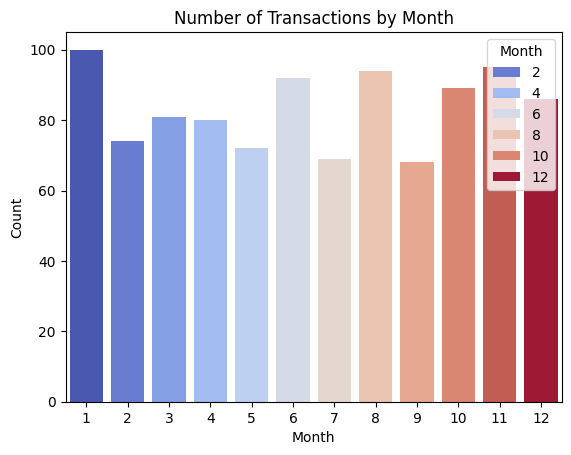

In [25]:
# Extract month from TransactionDate
df['Month'] = df['TransactionDate'].dt.month

# Plot transactions by month
sns.countplot(x='Month', data=df, palette='coolwarm', hue='Month')
plt.title('Number of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

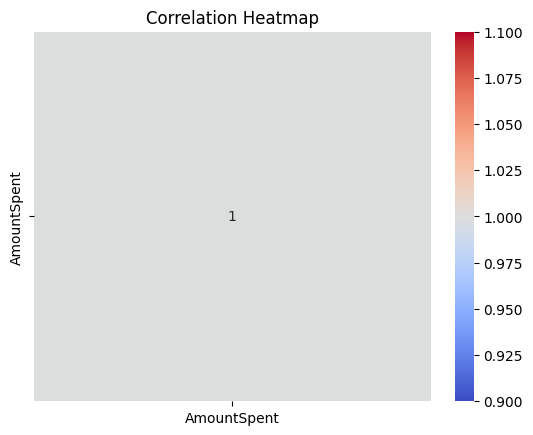

In [26]:
# Correlation matrix
corr = df[['AmountSpent']].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()